## 知識情報学第8回演習サンプルプログラム ex8.ipynb
- Programmed by Nattapong Thammasan, 監修　福井健一
- Last updated: 2019/09/13
- Checked with Python 3.9.7, scikit-learn 1.1
- MIT License

## Wineデータに対するアンサンブル学習による識別
- 【課題1】決定木同様に，Bagging，Random Forest，Adaboost，GradientBoostingを実装し，識別境界面の描画および，学習データ，テストデータに対するAccuracyを算出しなさい．
- 【課題2】アンサンブル数や木の最大深さを変更して，影響を考察しなさい．特徴量は全て用いること．

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import scale
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

### Wineデータの読み込み

In [2]:
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
# 2次元に描画するため特徴量を2つに限定．特徴量のインデックスは上を参照
# ヒント：敢えて分類の難しい特徴量を選ぶと傾向が分かりやすくなります
d1 = 0
d2 = 1
X = scale(wine.data[:, [d1, d2]])
y = wine.target

In [4]:
# 学習データ70%，テストデータ30%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 1)

### 識別境界面をプロットする関数

In [5]:
x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
    
def plot_subfigure(Z1, classifer_name):

    Z1 = Z1.reshape(xx1.shape)

    plt.figure(figsize=(10,5))
    plt.subplot(121)

    plt.contourf(xx1, xx2, Z1, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_train)):
        plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

    plt.xlabel(wine.feature_names[d1]+' [standardized]')
    plt.ylabel(wine.feature_names[d2]+' [standardized]')
    plt.title(classifer_name+'\ntrain_data')

    plt.subplot(122)

    plt.contourf(xx1, xx2, Z1, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

    plt.xlabel(wine.feature_names[d1]+' [standardized]')
    plt.ylabel(wine.feature_names[d2]+' [standardized]')
    plt.title('test_data')
    plt.show()

### 決定木
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

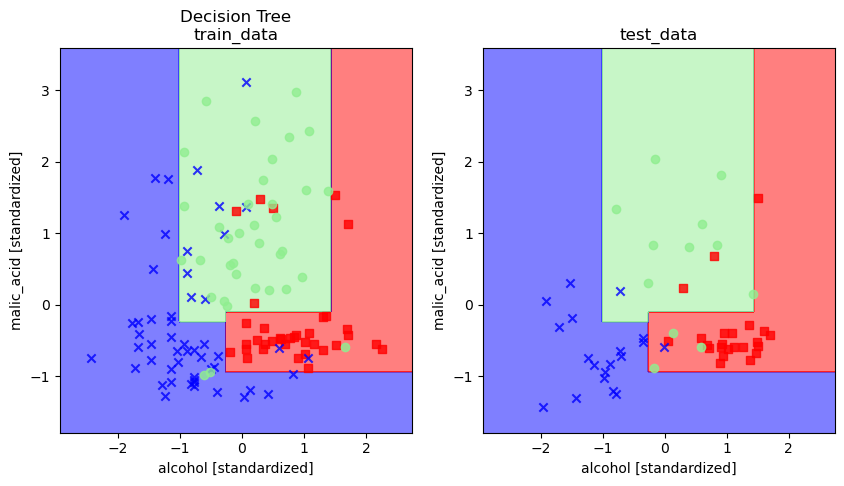

Decision tree	 train/test accuracies 0.855/0.870


In [6]:
# DecisionTreeClassifierのインスタンスとして変数treeを作成
tree = [YOUR CODE HERE]

# 学習データに適合
[YOUR CODE HERE]

# 全格子点に対して決定木によりクラスを推定（ヒント：ex2を参照）
Z = [YOUR CODE HERE]

plot_subfigure(Z, 'Decision Tree')

# 学習データ，テストデータに対して決定木によりクラスを推定
y_train_pred = [YOUR CODE HERE]
y_test_pred = [YOUR CODE HERE]

# 学習データ，テストデータに対してAccuracyの算出
tree_train = [YOUR CODE HERE]
tree_test = [YOUR CODE HERE]
print('Decision tree\t train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

### Bagging
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [ ]:
[YOUR CODE HERE]

###  Random Forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
[YOUR CODE HERE]

### AdaBoost
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    - 注意：デフォルトではmax_depth=1が設定されている

In [ ]:
[YOUR CODE HERE]

### Gradient Boosting
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
[YOUR CODE HERE]